In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt

In [2]:
import keras

In [3]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()

In [4]:
a=x_train.shape
b=y_train.shape

In [5]:
print("Training Images:",a)
print("Testing Images:",b)

Training Images: (50000, 32, 32, 3)
Testing Images: (50000, 1)


In [6]:
print(x_train[0].shape)

(32, 32, 3)


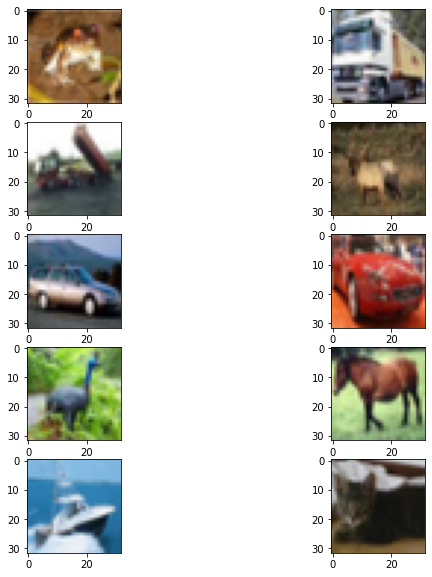

In [7]:
plt.figure(figsize=(10,10))
for i in range(0,10):
    plt.subplot(5,2,i+1)
    plt.imshow(x_train[i])
plt.show()

In [8]:
import numpy as np
from keras.utils import np_utils
x_train = x_train.reshape(x_train.shape[0],32,32,3)
x_test = x_test.reshape(x_test.shape[0],32,32,3)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train/=255
x_test/=255
n_classes=10
print("Shape Before One-Hot Encoding:",y_train.shape)
y_train = np_utils.to_categorical(y_train,n_classes)
y_test = np_utils.to_categorical(y_test,n_classes)
print("Shape After One-Hot Encoding:",y_train.shape)

Shape Before One-Hot Encoding: (50000, 1)
Shape After One-Hot Encoding: (50000, 10)


In [9]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Conv2D,MaxPool2D,Flatten

model = Sequential()
#Convolutional Layers
model.add(Conv2D(250,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu',input_shape=(32,32,3)))
model.add(Conv2D(175,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(500,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
#Hidden Layer
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250,activation='relu'))
model.add(Dropout(0.3))
#output layer
model.add(Dense(10,activation='softmax'))


In [10]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [11]:
model.fit(x_train,y_train,batch_size=150,epochs=100,validation_data=(x_test,y_test))

Epoch 1/100
334/334 [==============================] - 1434s 4s/step - loss: 1.6243 - accuracy: 0.4027 - val_loss: 1.1777 - val_accuracy: 0.5729
Epoch 2/100
334/334 [==============================] - 1418s 4s/step - loss: 1.1488 - accuracy: 0.5932 - val_loss: 0.9676 - val_accuracy: 0.6641
Epoch 3/100
334/334 [==============================] - 1418s 4s/step - loss: 0.9518 - accuracy: 0.6652 - val_loss: 0.8272 - val_accuracy: 0.7144
Epoch 4/100
334/334 [==============================] - 1425s 4s/step - loss: 0.8230 - accuracy: 0.7133 - val_loss: 0.7829 - val_accuracy: 0.7327
Epoch 5/100
334/334 [==============================] - 1407s 4s/step - loss: 0.7202 - accuracy: 0.7483 - val_loss: 0.7650 - val_accuracy: 0.7364
Epoch 6/100
334/334 [==============================] - 1415s 4s/step - loss: 0.6413 - accuracy: 0.7752 - val_loss: 0.7001 - val_accuracy: 0.7587
Epoch 7/100
334/334 [==============================] - 1278s 4s/step - loss: 0.5640 - accuracy: 0.8006 - val_loss: 0.6685 - val_ac

In [12]:
ModelInJson = model.to_json()

In [13]:
abc = open("D:/Datasets/inmovidu_AI_objectdetection_epochs_100","w")
abc.write(ModelInJson)
abc.close()

In [14]:
model.save_weights("D:/Datasets/inmovidu_AI_objectdetectionweights_epochs_100")

In [15]:
from keras.models import model_from_json

In [16]:
abc = open("D:/Datasets/inmovidu_AI_objectdetection_epochs_100","r")
loaded_data = abc.read()
loaded_model = model_from_json(loaded_data)
loaded_model.load_weights("D:/Datasets/inmovidu_AI_objectdetectionweights_epochs_100")

In [17]:
classes = range(0,10)
names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
class_labels = dict(zip(classes,names))
batch = x_test[100:109]
labels = np.argmax(y_test[100:109],axis=-1)
predictions = model.predict(batch,verbose=1)

1/1 [==============================] - 0s 493ms/step


In [18]:
print(predictions)

[[1.65300118e-03 6.72199749e-05 3.72287445e-02 7.57392347e-02
  4.52163845e-01 1.53460249e-01 3.19809164e-03 2.75814682e-01
  2.17398454e-04 4.57535440e-04]
 [2.56483140e-03 1.02130733e-04 1.89734891e-01 1.10895067e-01
  1.52726009e-01 3.29495817e-01 9.21314675e-03 2.03252941e-01
  5.08146652e-04 1.50702393e-03]
 [7.29922385e-06 8.67388189e-06 1.86445226e-03 7.73231499e-03
  9.89203574e-04 7.00661389e-04 9.88674998e-01 3.32209561e-06
  1.44751557e-05 4.56244879e-06]
 [3.54736471e-06 3.55131647e-07 7.52495194e-04 9.76149023e-01
  1.84357399e-03 1.44173729e-03 1.97815951e-02 1.53635483e-05
  4.28262956e-06 7.96340737e-06]
 [1.19069270e-07 9.96273518e-01 8.34989022e-12 1.61870083e-11
  8.43790082e-15 1.28554329e-12 1.48361889e-12 2.52395218e-12
  6.10745303e-07 3.72579251e-03]
 [3.60068384e-07 9.98528004e-01 2.89155611e-09 3.89094756e-09
  3.13027794e-12 1.22210034e-10 3.46572682e-09 1.66724204e-11
  2.04988595e-04 1.26665295e-03]
 [2.68509332e-02 4.05308083e-02 1.13680765e-01 3.65189403e

In [19]:
for image in predictions:
    print(np.sum(image))

1.0
1.0
1.0
0.99999994
1.0
1.0
0.99999994
0.99999994
0.99999994


In [20]:
class_result=np.argmax(predictions,axis=-1)
print(class_result)

[4 5 6 3 1 1 3 6 8]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

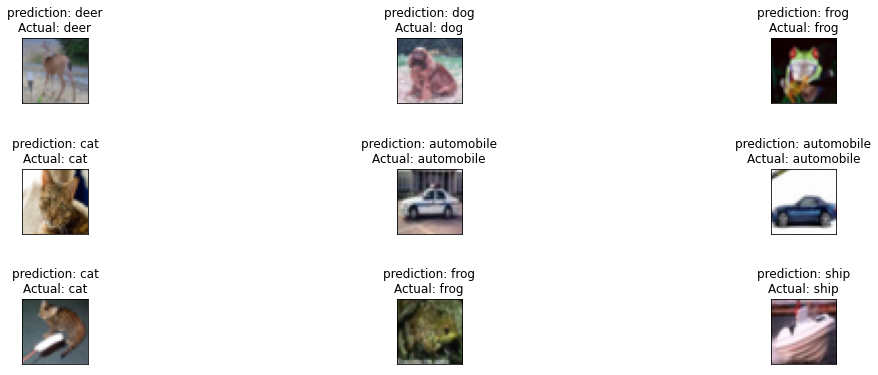

In [21]:
fig, axs =plt.subplots(3,3,figsize=(19,6))
fig.subplots_adjust(hspace=1)
axs = axs.flatten()
for i,img in enumerate(batch):
    for key,value in class_labels.items():
        if class_result[i]==key:
            title= 'prediction: {}\nActual: {}'.format(class_labels[key], class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)
        #Plotting Image
    axs[i].imshow(img)
plt.show()